In [1]:
import scdiffeq as sdq
import scdiffeq_analyses as sdq_an

h5ad_path = "/Users/mvinyard/adata.reprocessed_19OCT2023.more_feature_inclusive.h5ad"
adata = sdq.io.read_h5ad(h5ad_path)

AnnData object with n_obs × n_vars = 130887 × 2492
    obs: 'Library', 'Cell barcode', 'Time point', 'Starting population', 'Cell type annotation', 'Well', 'SPRING-x', 'SPRING-y', 'clone_idx', 'fate_observed', 't0_fated', 'train'
    var: 'gene_ids', 'hv_gene', 'must_include', 'exclude', 'use_genes'
    uns: 'fate_counts', 'h5ad_path', 'time_occupance'
    obsm: 'X_clone', 'X_pca', 'X_umap', 'cell_fate_df'
    layers: 'X_scaled'


## Process the raw screening results

Make sure the directory structure looks something like the following:

```
./screen_results
  ├── csv/
  └── pkl/
      ├── screen_results.LARRY_full_dataset.version_0.ckpt_1874.v00.pkl
      ├── screen_results.LARRY_full_dataset.version_1.ckpt_last.v00.pkl
      ├── screen_results.LARRY_full_dataset.version_2.ckpt_1238.v00.pkl
      ├── screen_results.LARRY_full_dataset.version_3.ckpt_1204.v00.pkl
      └── screen_results.LARRY_full_dataset.version_4.ckpt_1667.v00.pkl
```

In [2]:
processed_results = sdq_an.perturb.process_raw_results(results_dir="/Users/mvinyard/screen_results/")

In [3]:
meta_analysis = sdq_an.perturb.meta_analysis(
    results = processed_results, fates = ['Neutrophil', 'Monocyte', 'Baso'],
)

## Volcano plots

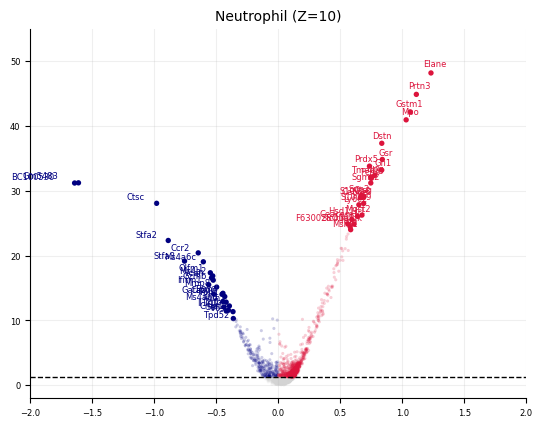

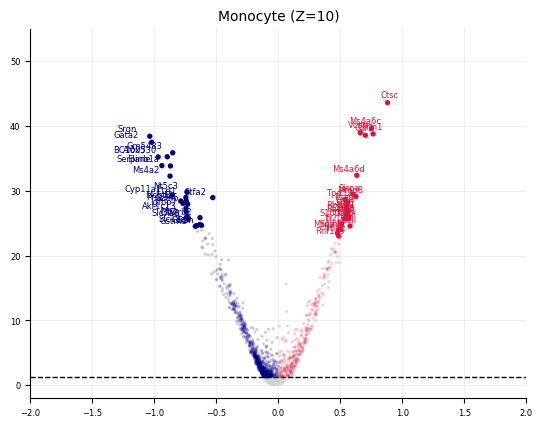

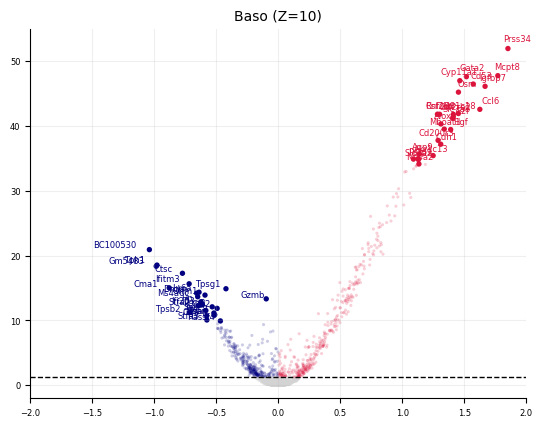

In [4]:
for fate, analysis in meta_analysis.items():
    highlight_genes = analysis['stat_df'].sort_values("combined_pval").groupby("pos").head(25).index.tolist()
    sdq_an.pl.meta_analysis_volcano(
        stats=analysis['stat_df'],
        highlight_genes=highlight_genes,
        xlim=(-2,2),
        ylim=(-2,55),
        plot_kwargs={
            "height": 1, 
            "width": 1,
            "title": [f"{fate} (Z=10)"]
        },
        save_path=f"LARRY.full_dataset.fate_perturbation_screen.{fate}.volcano_plot.Z=10.svg"
    )

## Save results for Supplementary Tables

In [5]:
for fate, results in meta_analysis.items():
    stat_df = results['stat_df']
    unanimously_significant_genes = results['unanimously_significant_genes']
    stat_df.to_csv(f"./SupplementaryTable.LARRY_fate_perturbation_screen.{fate}.stat_table.csv")
    unanimously_significant_genes.to_csv(
        f"./SupplementaryTable.LARRY_fate_perturbation_screen.{fate}.unanimously_significant_genes.csv",
    )